In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
from scipy.fftpack import fftshift
from matplotlib import style
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings('always')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
plt.style.use("bmh")
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.decomposition import PCA

from scipy.stats import spearmanr, kendalltau
import missingno as msno
import os
import joblib
import tarfile
import urllib


# classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,StackingClassifier
# HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
# #regression
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
# from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV

#model selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, KFold, train_test_split, cross_validate

# #evaluation metrics
# from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, plot_confusion_matrix, classification_report  # for classification

from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score, make_scorer

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Preprocessing & Imputing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from tpot import TPOTClassifier

from sklearn.metrics import classification_report, confusion_matrix  
# #model selection
# from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, KFold, train_test_split, cross_validate

# #evaluation metrics
# from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from sklearn import metrics

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Workflow goals
The data science solutions workflow solves for seven major goals.

### Classifying. 
We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

### Correlating.
One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

### Converting.
For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

### Completing.
Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

### Correcting.
We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

### Creating.
Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

### Charting. 
How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df=train.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [7]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Oreskovic, Mr. Luka",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


<AxesSubplot:>

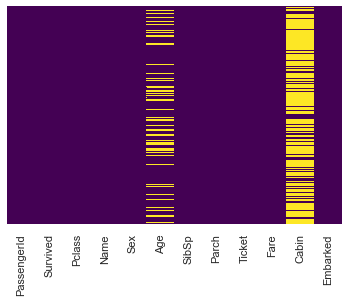

In [13]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [14]:
df.Age.isna().sum()

177

In [15]:
df.Cabin.isna().sum()

687

In [16]:
df.Embarked.isna().sum()

2

In [17]:
def check_missing_values(df, df_name=None):
    print(f'{df_name} - Missing values:')
    print('-'*30)
    columns = df.columns

    for column in columns:
        count_missing_values = df[column].isnull().sum()
        missing_values = (count_missing_values / len(df[column])) * 100
    
        if missing_values !=0:
            print(f'{column} --> {count_missing_values} values | {missing_values:.2f}%')

In [18]:
check_missing_values(df,'train')

train - Missing values:
------------------------------
Age --> 177 values | 19.87%
Cabin --> 687 values | 77.10%
Embarked --> 2 values | 0.22%


In [19]:
check_missing_values(test,'test')

test - Missing values:
------------------------------
Age --> 86 values | 20.57%
Fare --> 1 values | 0.24%
Cabin --> 327 values | 78.23%


In [20]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [21]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Summary of Variables and what to do with each one

PassengerId: Unique identification of the passenger. -> Delete

Survived: Survival (0 = No, 1 = Yes). -> Ready

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). -> Encode (categorical)

Name: Name of the passenger. -> Still don't know

Sex: Sex. -> Encode (categorical)

Age: Age in years. -> Fill missing values in an easy way and maybe group in intervals

SibSp: # of siblings / spouses aboard the Titanic. -> Ready

Parch: # of parents / children aboard the Titanic. -> Ready

Ticket: Ticket number. -> Delete?

Fare: Passenger fare. -> Maybe group in intervals

Cabin: Cabin number. -> Delete

Embarked: Port of Embarkation. Encode (categorical)

In [22]:
for i,cat in enumerate(df[['Survived', 'Pclass', 'Sex', 'Parch', 'SibSp', 'Embarked']]):
    val_counts = df[cat].value_counts()
    dominant_frac = val_counts.iloc[0:7] / len(df)
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')
    print('----------------------------------')

`0` alone contributes to 0    61.62
1    38.38
Name: Survived, dtype: float64% of Survived
----------------------------------
`3` alone contributes to 3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64% of Pclass
----------------------------------
`male` alone contributes to male      64.76
female    35.24
Name: Sex, dtype: float64% of Sex
----------------------------------
`0` alone contributes to 0    76.09
1    13.24
2     8.98
5     0.56
3     0.56
4     0.45
6     0.11
Name: Parch, dtype: float64% of Parch
----------------------------------
`0` alone contributes to 0    68.24
1    23.46
2     3.14
4     2.02
3     1.80
8     0.79
5     0.56
Name: SibSp, dtype: float64% of SibSp
----------------------------------
`S` alone contributes to S    72.28
C    18.86
Q     8.64
Name: Embarked, dtype: float64% of Embarked
----------------------------------


In [23]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [27]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


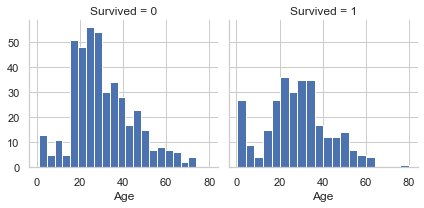

In [28]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Infants (Age <=4) had high survival rate.

Oldest passengers (Age = 80) survived.

Large number of 15-25 year olds did not survive.

Most passengers are in 15-35 age range.

In [29]:
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])\
.replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [30]:
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])\
.replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [31]:
df['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [32]:
test['numeric_ticket'].value_counts()

1    296
0    122
Name: numeric_ticket, dtype: int64

In [33]:
df['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
sopp           3
wep            3
sotono2        2
scah           2
ppp            2
swpp           2
fa             1
scahbasle      1
sca4           1
fc             1
sc             1
as             1
casoton        1
sop            1
sp             1
scow           1
Name: ticket_letters, dtype: int64

In [34]:
pd.pivot_table(df,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [35]:
pd.pivot_table(df,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [36]:
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [37]:
test['cabin_multiple'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test['cabin_adv'] = test.Cabin.apply(lambda x: str(x)[0])
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [38]:
df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_Parch'] = np.log(df.Parch+1)

df['norm_fare'] = np.log(df.Fare+1)

In [39]:
test['norm_sibsp'] = np.log(test.SibSp+1)
test['norm_Parch'] = np.log(test.Parch+1)

In [40]:
df.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

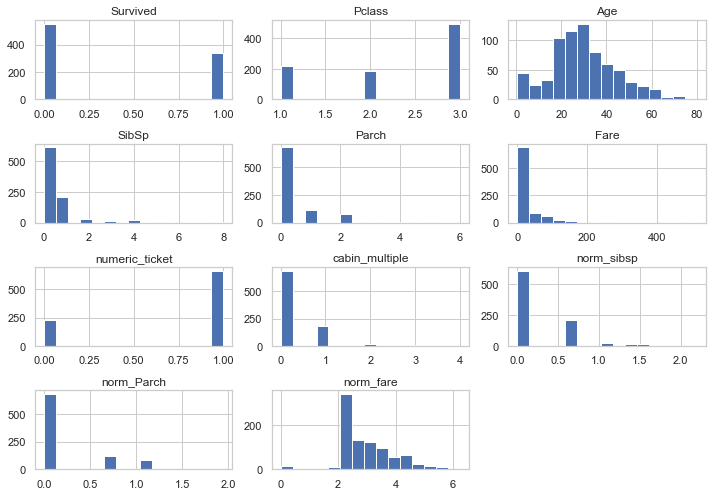

In [41]:
df.hist(bins=15, figsize=(10, 7))
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='Density'>

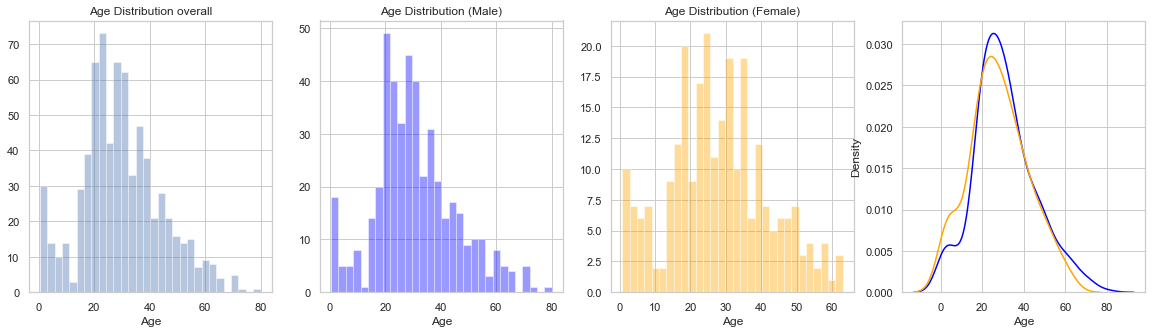

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))

sns.distplot(df['Age'].dropna(), kde=False, bins=30, ax=axes[0])
axes[0].set_title('Age Distribution overall')

sns.distplot(df[df['Sex']=='male']['Age'].dropna(),
             kde=False, color='blue', bins=30, ax=axes[1])
axes[1].set_title('Age Distribution (Male)')

sns.distplot(df[df['Sex']=='female']['Age'].dropna(),
             kde=False, color='orange', bins=30, ax=axes[2])
axes[2].set_title('Age Distribution (Female)')

sns.kdeplot(df[df['Sex']=='male']['Age'].dropna(),
            color='blue', ax=axes[3])
sns.kdeplot(df[df['Sex']=='female']['Age'].dropna(),
            color='orange', ax=axes[3])

The distributions by sex are similar

There are extreme values (outliers?)

Text(0, 0.5, '')

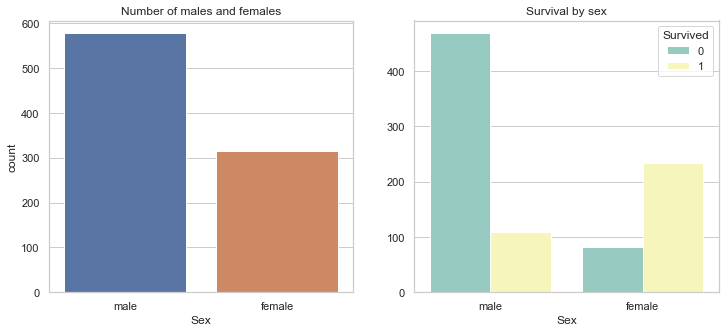

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title('Number of males and females')

sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1], palette='Set3')
axes[1].set_title('Survival by sex')
axes[1].set_ylabel('')

There are more males than females

Males tend to die, Females tend to survive

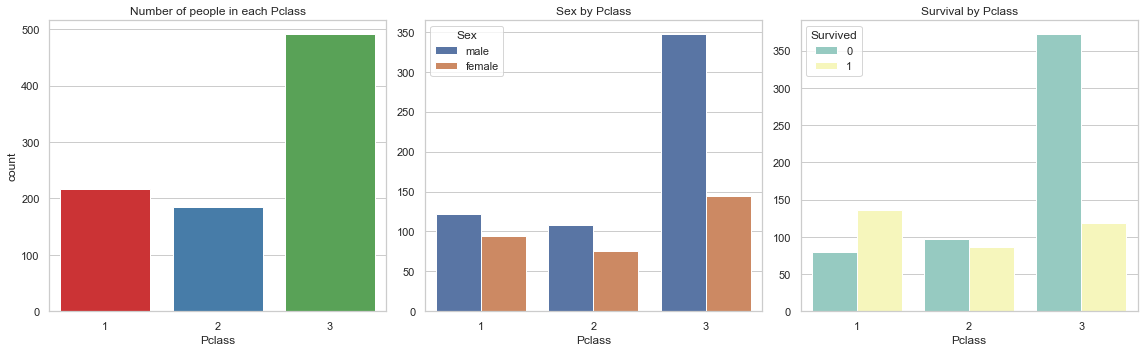

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.countplot(x='Pclass', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Number of people in each Pclass')

sns.countplot(x='Pclass', hue='Sex', data=df, ax=axes[1])
axes[1].set_title('Sex by Pclass')
axes[1].set_ylabel('')

sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[2], palette='Set3')
axes[2].set_title('Survival by Pclass')
axes[2].set_ylabel('')

plt.tight_layout()

More people in third class

Higher ratio Survive:Die in third class

More men than women die indepentedly of the class

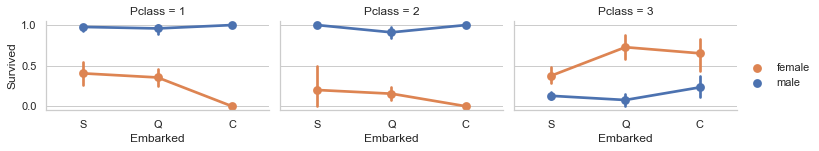

In [45]:
grid = sns.FacetGrid(df, col='Pclass', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Embarked', 'Survived', 'Sex', palette='deep')
grid.add_legend()

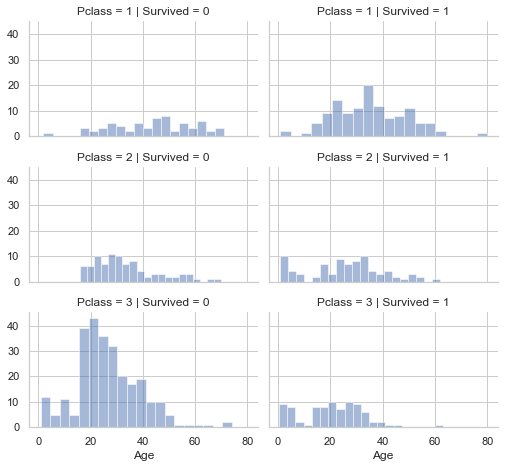

In [46]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Pclass=3 had most passengers, however most did not survive. 

Infant passengers in Pclass=2 and Pclass=3 mostly survived.

Most passengers in Pclass=1 survived.

Pclass varies in terms of Age distribution of passengers.

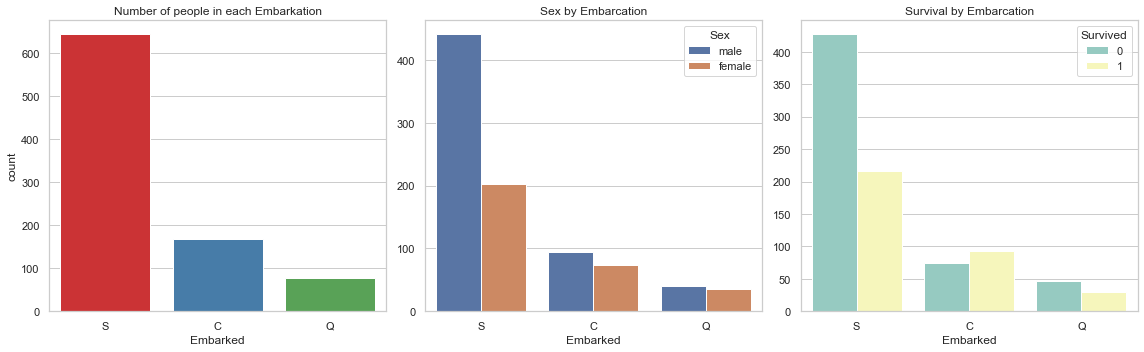

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.countplot(x='Embarked', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Number of people in each Embarkation')

sns.countplot(x='Embarked', hue='Sex', data=df, ax=axes[1])
axes[1].set_title('Sex by Embarcation')
axes[1].set_ylabel('')

sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2], palette='Set3')
axes[2].set_title('Survival by Embarcation')
axes[2].set_ylabel('')

plt.tight_layout()

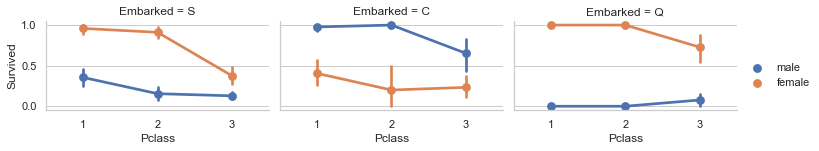

In [48]:
grid = sns.FacetGrid(df, col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Female passengers had much better survival rate than males.

Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.

Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

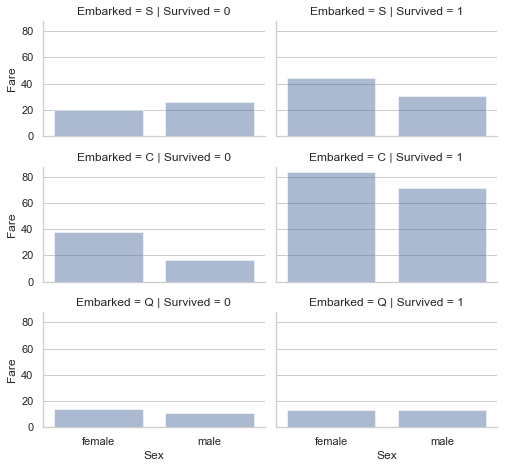

In [49]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Survival rates

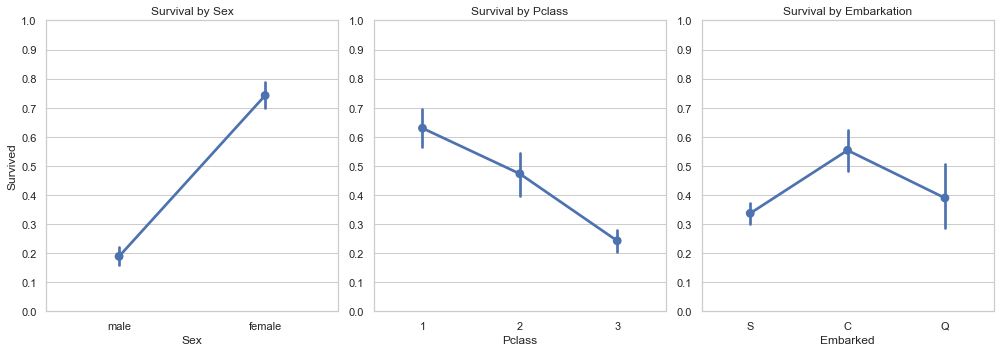

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(14,5))

sns.pointplot(x ='Sex', y="Survived", data=df, ax=axes[0])
axes[0].set_title('Survival by Sex')

sns.pointplot(x ='Pclass', y="Survived", data=df, ax=axes[1])
axes[1].set_title('Survival by Pclass')
axes[1].set_ylabel('')

sns.pointplot(x ='Embarked', y="Survived", data=df, ax=axes[2])
axes[2].set_title('Survival by Embarkation')
axes[2].set_ylabel('')

for ax in axes:
    ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()

# Numerical variables

In [51]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

In [52]:
nums = ['Age', 'Fare']

for col in nums:
    outliers = tukey_outliers(df[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* Age doesn't have any tukey outliers.

* Fare has these tukey outliers,
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64



Text(0.5, 1.0, 'Survival by Age')

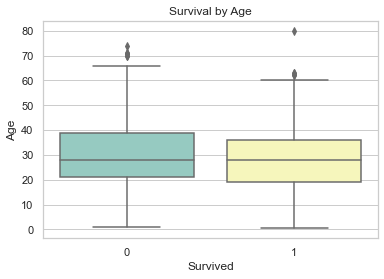

In [53]:
sns.boxplot(x='Survived', y='Age', data=df, palette='Set3')
plt.title('Survival by Age')

Before Shape: (891, 17)
After Shape: (706, 17)


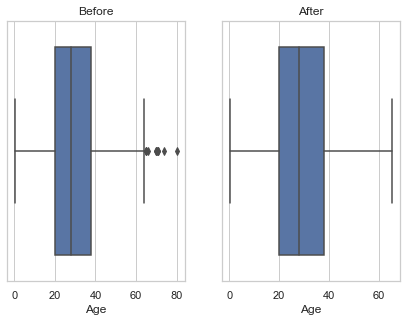

In [54]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Age']<66)]
print("After Shape:",df2.shape)

sns.boxplot(df['Age'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Age'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

Text(0.5, 1.0, 'Survival by Fare')

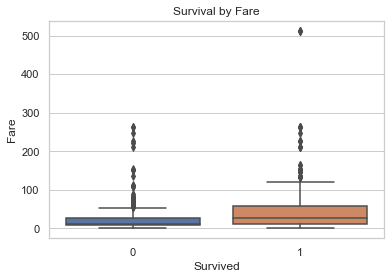

In [55]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Survival by Fare')

Before Shape: (891, 17)
After Shape: (720, 17)


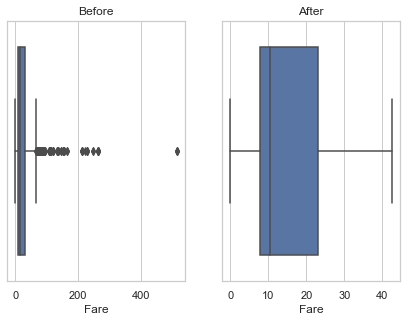

In [56]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",df.shape)
## Removing humidity bellow 0 outliers
df2 = df[(df['Fare']<46)]
print("After Shape:",df2.shape)

sns.boxplot(df['Fare'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Fare'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# Replace new dataset with previous and resetting indexes
# df=df2;
# df=df.reset_index(drop=True)

In [57]:
df.corr()['Survived']

Survived          1.000000
Pclass           -0.338481
Age              -0.077221
SibSp            -0.035322
Parch             0.081629
Fare              0.257307
numeric_ticket    0.001492
cabin_multiple    0.277053
norm_sibsp        0.029430
norm_Parch        0.114999
norm_fare         0.329862
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Correlations between variables')

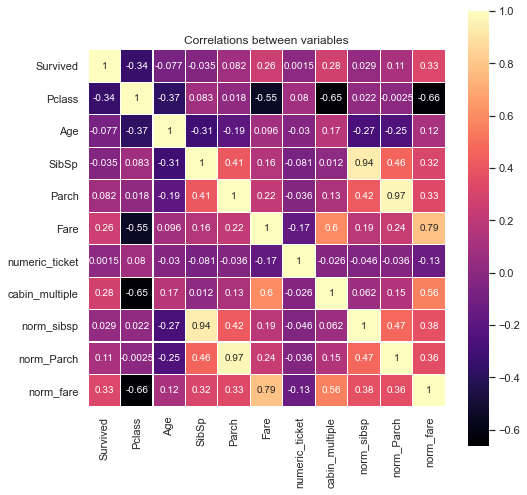

In [58]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(), annot=True, cmap='magma', square=True,
            linecolor="white", linewidths=0.1)
plt.title('Correlations between variables')

Create Family size (Family = SibSp + Parch) and Alone if doesn't have family members

Fill all the missing values of Age in both dataframes (with mean based on Sex and Pclass) -> Maybe use some algorithm to predict them, in a future project.

Fill 2 values of Emarked from df_train with the most common one or check in relation with other variables


In [59]:
df['Familysize'] = df['SibSp'] + df['Parch']+1
test['Familysize'] = test['SibSp'] + test['Parch']+1

df[["Familysize", "Survived"]].groupby(['Familysize'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [60]:
df['Alone'] = df['Familysize'].apply(lambda x: 1 if x == 0 else 0)

test['Alone'] = test['Familysize'].apply(lambda x: 1 if x == 0 else 0)

In [61]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,numeric_ticket,ticket_letters,cabin_multiple,cabin_adv,name_title,norm_sibsp,norm_Parch,norm_fare,Familysize,Alone
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,1,0,1,B,Miss,0.0,0.0,4.394449,1,0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,1,0,1,B,Mrs,0.0,0.0,4.394449,1,0


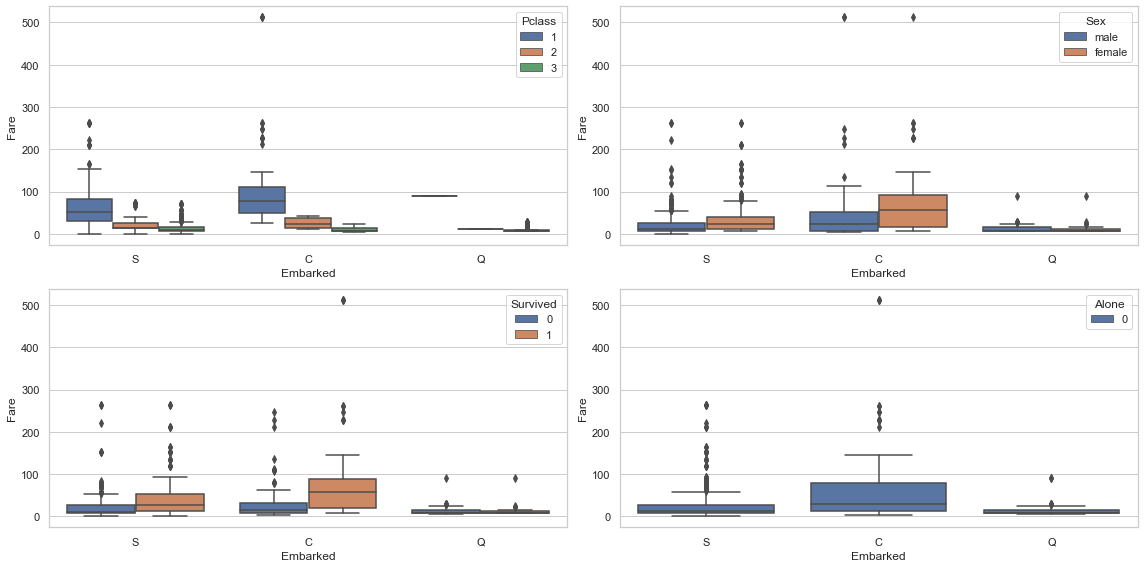

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df, ax=axes[0,0])

sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=df, ax=axes[0,1])

sns.boxplot(x="Embarked", y="Fare", hue="Survived", data=df, ax=axes[1,0])

sns.boxplot(x="Embarked", y="Fare", hue="Alone", data=df, ax=axes[1,1])

plt.tight_layout()

### Based on the median values of the plots seems likely to be 'C' > 'S', definitely is not Q. I'll go with C since Pclass, Sex and Survived point to that.

In [63]:
df['Embarked'].fillna('C',inplace=True)

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

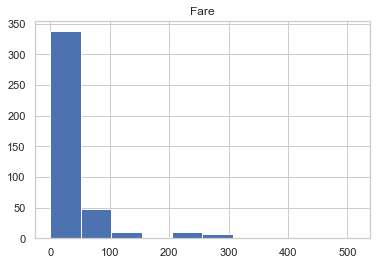

In [64]:
test.hist(column='Fare')

In [65]:
test.Fare.median()

14.4542

In [66]:
# test.Fare.value_counts()

In [67]:
test.Fare.replace(np.nan,test.Fare.median(),inplace=True)

test['norm_fare'] = np.log(test.Fare+1)

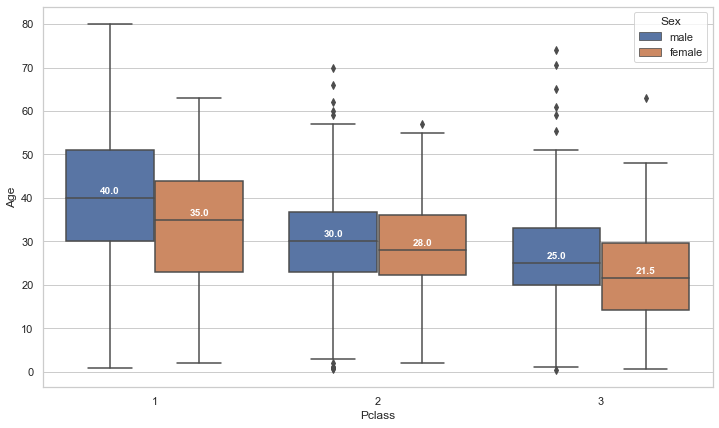

In [68]:
plt.figure(figsize=(12, 7))

testPlot = sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)

m1 = df.groupby(['Pclass', 'Sex'])['Age'].median().values
mL1 = [str(np.round(s, 2)) for s in m1]

ind = 0
for tick in range(len(testPlot.get_xticklabels())):
    testPlot.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='semibold')
    testPlot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind += 2

In [69]:
m1[0+1]+1

41.0

In [70]:
m1[0]+1

36.0

In [71]:
m1

array([35. , 40. , 28. , 30. , 21.5, 25. ])

In [72]:
def get_age(cols):
    age = cols[0]
    pclass = cols[1]
    sex = cols[2]
    
    if pd.isnull(age):

        if pclass == 1:
            if sex == 'male':
                return 40
            else:
                return 35

        elif pclass == 2:
            if sex == 'male':
                return 30
            else:
                return 28

        else:
            if sex == 'male':
                return 25
            else:
                return 21.5
            
    else:
        return age

In [73]:
df['Age'] = df[['Age','Pclass', 'Sex']].apply(get_age, axis=1)

In [74]:
test['Age'] = test[['Age','Pclass', 'Sex']].apply(get_age, axis=1)

In [75]:
def get_title(name):
    for string in name.split():
        if '.' in string:
            return string[:-1]

In [76]:
df['Title'] = df['Name'].apply(lambda x: get_title(x))

test['Title'] = test['Name'].apply(lambda x: get_title(x))

In [77]:
df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Ms            1
Lady          1
Capt          1
Jonkheer      1
Countess      1
Mme           1
Don           1
Name: Title, dtype: int64

In [78]:
df.Name[10].split()

['Sandstrom,', 'Miss.', 'Marguerite', 'Rut']

In [79]:
df.drop('Name', axis=1, inplace=True)

test.drop('Name', axis=1, inplace=True)

In [80]:
# ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
#        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
#        'Jonkheer']

In [81]:
df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Dona', 'Countess', 'Jonkheer'], 'Other')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [82]:
test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Dona', 'Countess', 'Jonkheer'], 'Other')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [83]:
df.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [84]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [85]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
df['Title_num'] = df['Title'].map(title_mapping)
df['Title_num'] = df['Title_num'].fillna(0)

test['Title_num'] = test['Title'].map(title_mapping)
test['Title_num'] = test['Title_num'].fillna(0)

In [86]:
df.Title_num.value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title_num, dtype: int64

In [87]:
df['Sex_num'] = df['Sex'].replace( {'female': 0, 'male': 1})

test['Sex_num'] = test['Sex'].replace( {'female': 0, 'male': 1})

In [88]:
df['Embarked_num'] = df['Embarked'].replace( {'S': -1, 'Q': 0, 'C': 1})

test['Embarked_num'] = df['Embarked'].replace( {'S': -1, 'Q': 0, 'C': 1})

In [89]:
df['Pclass_num'] = df['Pclass'].replace( {1: -1, 2: 0, 3: 1})

test['Pclass_num'] = test['Pclass'].replace( {1: -1, 2: 0, 3: 1})

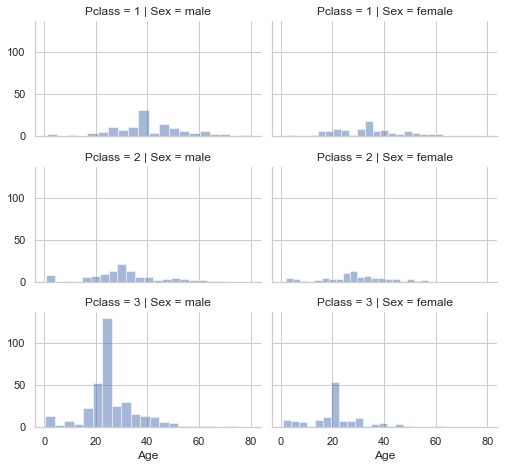

In [90]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [91]:
# guess_ages = np.zeros((2,3))

# for i in range(0, 2):
#     for j in range(0, 3):
#         guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

#         # age_mean = guess_df.mean()
#         # age_std = guess_df.std()
#         # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

#         age_guess = guess_df.median()

#         # Convert random age float to nearest .5 age
#         guess_ages[i,j] = int( (age_guess/0.5) + 0.5 ) * 0.5
            
# for i in range(0, 2):
#     for j in range(0, 3):
#         df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]

# df['Age'] = df['Age'].astype(int)



In [92]:
# df['AgeBand'] = pd.cut(df['Age'], 5)
# df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [93]:
df['Age1'] = df.Age

test['Age1'] = test.Age

In [94]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

In [95]:
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4

In [96]:
# df = df.drop(['AgeBand'], axis=1)

In [97]:
df['Age*Class'] = df.Age * df.Pclass

test['Age*Class'] = test.Age * test.Pclass

In [98]:
# df['FareBand'] = pd.qcut(df['Fare'], 4)
# df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [99]:
df['Fare1'] = df.Fare

test['Fare1'] = test.Fare

In [100]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

# df = df.drop(['FareBand'], axis=1)

In [101]:
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)


In [102]:
# sex = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
title = pd.get_dummies(df['Title'], prefix='Title', drop_first=True)

df.drop(['Sex', 'Embarked', 'Pclass', 'Title'], axis=1, inplace=True)

df = pd.concat([df, embarked, pclass, title], axis=1)

In [103]:
embarked = pd.get_dummies(test['Embarked'], prefix='Embarked', drop_first=True)
pclass = pd.get_dummies(test['Pclass'], prefix='Pclass', drop_first=True)
title = pd.get_dummies(test['Title'], prefix='Title', drop_first=True)

test.drop(['Sex', 'Embarked', 'Pclass', 'Title'], axis=1, inplace=True)

test = pd.concat([test, embarked, pclass, title], axis=1)

In [104]:
df.corr()['Survived'].sort_values()[:-1]

Title_Mr         -0.549199
Sex_num          -0.543351
Pclass_num       -0.338481
Pclass_3         -0.322308
Age*Class        -0.270304
Embarked_S       -0.155660
Age1             -0.059579
Age              -0.036384
SibSp            -0.035322
Title_Other      -0.012054
numeric_ticket    0.001492
Embarked_Q        0.003650
Familysize        0.016639
norm_sibsp        0.029430
Parch             0.081629
Pclass_2          0.093349
norm_Parch        0.114999
Embarked_num      0.174199
Fare1             0.257307
cabin_multiple    0.277053
Fare              0.295875
norm_fare         0.329862
Title_Miss        0.335636
Title_Mrs         0.341994
Title_num         0.407753
Survived          1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

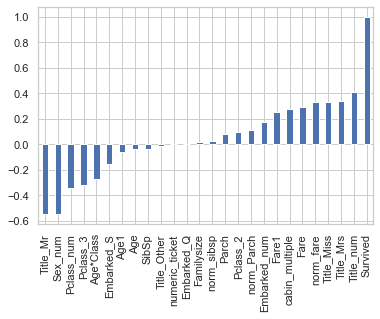

In [105]:
df.corr()['Survived'].sort_values()[:-1].plot.bar()

In [106]:
df.Age.unique().max()

4.0

In [107]:
df.Age.unique().min()

0.0

In [108]:
df.Fare.unique().max()

3

In [109]:
df.Fare.unique().min()

0

In [110]:
df.dtypes

Survived            int64
Age               float64
SibSp               int64
Parch               int64
Fare                int32
numeric_ticket      int64
ticket_letters     object
cabin_multiple      int64
cabin_adv          object
name_title         object
norm_sibsp        float64
norm_Parch        float64
norm_fare         float64
Familysize          int64
Alone               int64
Title_num           int64
Sex_num             int64
Embarked_num        int64
Pclass_num          int64
Age1              float64
Age*Class         float64
Fare1             float64
Embarked_Q          uint8
Embarked_S          uint8
Pclass_2            uint8
Pclass_3            uint8
Title_Miss          uint8
Title_Mr            uint8
Title_Mrs           uint8
Title_Other         uint8
dtype: object

In [111]:
df.ticket_letters.unique()

array(['a5', 'pc', 'stono2', 0, 'pp', 'ca', 'scparis', 'sca4', 'a4', 'sp',
       'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'fcc', 'swpp',
       'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle', 'sopp', 'fc',
       'sotono2', 'casoton'], dtype=object)

In [112]:
df.cabin_adv.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [113]:
# df.ticket_letters.apply(LabelEncoder().fit_transform)

# df[ "cabin_adv"] = le.fit_transform(df[ "cabin_adv"])
# test[ "cabin_adv"] = le.transform(test[ "cabin_adv"])

# df[ "ticket_letters"] = le.fit_transform(df[ "ticket_letters"])
# test[ "ticket_letters"] = le.transform(test[ "ticket_letters"])

# df[["ticket_letters", "cabin_adv"]] = le.fit_transform(df[["ticket_letters", "cabin_adv"]])

# test[["ticket_letters", "cabin_adv"]] = le.transform(test[["ticket_letters", "cabin_adv"]])

In [114]:
# df.drop(['name_title','cabin_adv','ticket_letters'], axis=1,inplace=True)

In [115]:
X = df.drop(['Survived','name_title','cabin_adv','ticket_letters'], axis=1)
y = df['Survived']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)

In [117]:
# scaler = StandardScaler()
# df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [118]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [119]:
df.shape

(891, 30)

In [120]:
549 /891

0.6161616161616161

In [121]:
logreg = LogisticRegression(random_state=121)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8379888268156425


In [122]:
logreg = LogisticRegression(random_state=121)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,18],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [123]:
# model = GridSearchCV(logreg, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# model.fit(X_train, y_train)

# print('Best Params:', model.best_params_)

In [124]:
# C=0.9, penalty='l1', solver='liblinear' ,83.80

In [125]:
best_lr = LogisticRegression(C=6,penalty='l2',solver='liblinear')
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)

In [126]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print('-'*55)
print(classification_report(y_test, y_pred))
print('-'*55)
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.24%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

-------------------------------------------------------
[[98 12]
 [18 51]]


In [127]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error rate vs Number of neighbors')

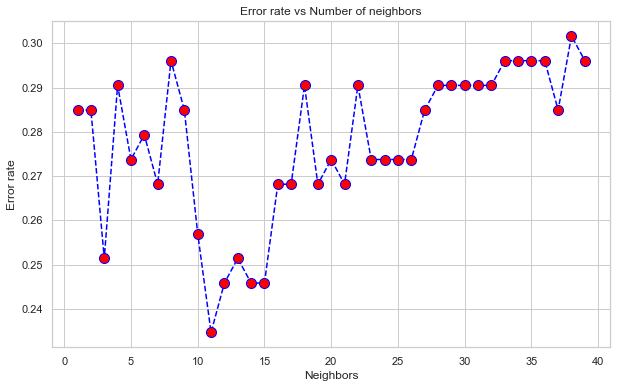

In [128]:
# Plot Error rate vs Number of neighbors
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,color='blue', ls='--',
         marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Neighbors')
plt.ylabel('Error rate')
plt.title('Error rate vs Number of neighbors')

In [129]:
knn = KNeighborsClassifier(n_neighbors=15,algorithm='ball_tree',n_jobs=-1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [130]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print('-'*55)
print(classification_report(y_test, y_pred))
print('-'*55)
print(confusion_matrix(y_test, y_pred))

Accuracy: 75.42%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       110
           1       0.70      0.62      0.66        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179

-------------------------------------------------------
[[92 18]
 [26 43]]


In [131]:
rf = RandomForestClassifier(random_state=121)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8324022346368715


In [132]:
param_grid = {
   'criterion':['giny', 'entropy'],
   'n_estimators':[50, 100, 500, 750, 1000],
   'max_depth':[5,6,7, 8,9,10],
   'min_samples_split':[2, 5, 10, 15, 100],
   'min_samples_leaf':[1, 5, 10]}

In [133]:
# model = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# model.fit(X_train, y_train)

# print('Best Params:', model.best_params_)

In [134]:
best_rf = RandomForestClassifier(random_state=121, criterion='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=50)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [135]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print('-'*55)
print(classification_report(y_test, y_pred))
print('-'*55)
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.80%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

-------------------------------------------------------
[[97 13]
 [16 53]]


In [136]:
# nb_classifier = GaussianNB()

# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# gs_NB = GridSearchCV(estimator=nb_classifier, 
#                  param_grid=params_NB, 
#                  cv=10,   # use any cross validation technique 
#                  verbose=1, 
#                  scoring='accuracy') 
# gs_NB.fit(X_train, y_train)

# print(gs_NB.best_params_)

# print(confusion_matrix(y_test, y_pred))

In [137]:
nb_classifier = GaussianNB(var_smoothing= 8.111308307896872e-05)

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8044692737430168


In [138]:
print(confusion_matrix(y_test, y_pred))

[[99 11]
 [24 45]]


In [139]:
SVC_classifier = SVC()

SVC_classifier.fit(X_train, y_train)

y_pred = SVC_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6759776536312849
[[101   9]
 [ 49  20]]


In [140]:
LinearSVC_classifier = LinearSVC()

LinearSVC_classifier.fit(X_train, y_train)

y_pred = LinearSVC_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7653631284916201
[[99 11]
 [31 38]]


In [141]:
GradientBoosting_classifier = GradientBoostingClassifier()

GradientBoosting_classifier.fit(X_train, y_train)

y_pred = GradientBoosting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8268156424581006


In [142]:
print(confusion_matrix(y_test, y_pred))

[[96 14]
 [17 52]]


In [143]:
Bagging_classifier = BaggingClassifier()

Bagging_classifier.fit(X_train, y_train)

y_pred = Bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8491620111731844


In [144]:
print(confusion_matrix(y_test, y_pred))

[[98 12]
 [15 54]]


In [145]:
AdaBoost_classifier = AdaBoostClassifier()

AdaBoost_classifier.fit(X_train, y_train)

y_pred = AdaBoost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7932960893854749


In [146]:
print(confusion_matrix(y_test, y_pred))

[[93 17]
 [20 49]]


In [147]:
xgb = XGBClassifier(random_state=121)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

[07:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8603351955307262


In [148]:
print(confusion_matrix(y_test, y_pred))

[[98 12]
 [13 56]]


In [149]:
CatBoost_classifier = CatBoostClassifier()

CatBoost_classifier.fit(X_train, y_train)

y_pred = CatBoost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Learning rate set to 0.008911
0:	learn: 0.6874472	total: 144ms	remaining: 2m 24s
1:	learn: 0.6812164	total: 147ms	remaining: 1m 13s
2:	learn: 0.6753549	total: 150ms	remaining: 49.7s
3:	learn: 0.6701691	total: 152ms	remaining: 37.9s
4:	learn: 0.6646097	total: 155ms	remaining: 30.8s
5:	learn: 0.6590470	total: 158ms	remaining: 26.1s
6:	learn: 0.6539511	total: 160ms	remaining: 22.7s
7:	learn: 0.6484745	total: 163ms	remaining: 20.2s
8:	learn: 0.6434521	total: 166ms	remaining: 18.3s
9:	learn: 0.6380793	total: 168ms	remaining: 16.7s
10:	learn: 0.6340415	total: 171ms	remaining: 15.4s
11:	learn: 0.6291378	total: 174ms	remaining: 14.3s
12:	learn: 0.6246981	total: 177ms	remaining: 13.4s
13:	learn: 0.6204981	total: 179ms	remaining: 12.6s
14:	learn: 0.6164172	total: 182ms	remaining: 11.9s
15:	learn: 0.6118140	total: 184ms	remaining: 11.3s
16:	learn: 0.6076514	total: 187ms	remaining: 10.8s
17:	learn: 0.6034800	total: 189ms	remaining: 10.3s
18:	learn: 0.5992560	total: 191ms	remaining: 9.87s
19:	learn

222:	learn: 0.3603677	total: 621ms	remaining: 2.17s
223:	learn: 0.3599478	total: 624ms	remaining: 2.16s
224:	learn: 0.3596321	total: 626ms	remaining: 2.15s
225:	learn: 0.3593695	total: 628ms	remaining: 2.15s
226:	learn: 0.3591610	total: 630ms	remaining: 2.14s
227:	learn: 0.3588511	total: 632ms	remaining: 2.14s
228:	learn: 0.3587040	total: 634ms	remaining: 2.13s
229:	learn: 0.3585150	total: 636ms	remaining: 2.13s
230:	learn: 0.3583819	total: 639ms	remaining: 2.13s
231:	learn: 0.3579993	total: 641ms	remaining: 2.12s
232:	learn: 0.3575984	total: 643ms	remaining: 2.12s
233:	learn: 0.3572635	total: 645ms	remaining: 2.11s
234:	learn: 0.3570086	total: 647ms	remaining: 2.1s
235:	learn: 0.3566842	total: 649ms	remaining: 2.1s
236:	learn: 0.3564347	total: 651ms	remaining: 2.1s
237:	learn: 0.3560734	total: 653ms	remaining: 2.09s
238:	learn: 0.3559040	total: 655ms	remaining: 2.08s
239:	learn: 0.3555425	total: 657ms	remaining: 2.08s
240:	learn: 0.3551936	total: 659ms	remaining: 2.08s
241:	learn: 0.3

384:	learn: 0.3247516	total: 964ms	remaining: 1.54s
385:	learn: 0.3246550	total: 966ms	remaining: 1.54s
386:	learn: 0.3244181	total: 968ms	remaining: 1.53s
387:	learn: 0.3242867	total: 969ms	remaining: 1.53s
388:	learn: 0.3238119	total: 971ms	remaining: 1.52s
389:	learn: 0.3234359	total: 973ms	remaining: 1.52s
390:	learn: 0.3231692	total: 976ms	remaining: 1.52s
391:	learn: 0.3230048	total: 978ms	remaining: 1.52s
392:	learn: 0.3229011	total: 980ms	remaining: 1.51s
393:	learn: 0.3228948	total: 981ms	remaining: 1.51s
394:	learn: 0.3228135	total: 983ms	remaining: 1.5s
395:	learn: 0.3226509	total: 985ms	remaining: 1.5s
396:	learn: 0.3224436	total: 987ms	remaining: 1.5s
397:	learn: 0.3222221	total: 989ms	remaining: 1.5s
398:	learn: 0.3221047	total: 991ms	remaining: 1.49s
399:	learn: 0.3218814	total: 993ms	remaining: 1.49s
400:	learn: 0.3216631	total: 996ms	remaining: 1.49s
401:	learn: 0.3214900	total: 998ms	remaining: 1.48s
402:	learn: 0.3213200	total: 1000ms	remaining: 1.48s
403:	learn: 0.3

598:	learn: 0.2946104	total: 1.41s	remaining: 944ms
599:	learn: 0.2945958	total: 1.41s	remaining: 942ms
600:	learn: 0.2945000	total: 1.41s	remaining: 939ms
601:	learn: 0.2943426	total: 1.42s	remaining: 937ms
602:	learn: 0.2942435	total: 1.42s	remaining: 934ms
603:	learn: 0.2940870	total: 1.42s	remaining: 932ms
604:	learn: 0.2939644	total: 1.42s	remaining: 930ms
605:	learn: 0.2938463	total: 1.43s	remaining: 927ms
606:	learn: 0.2937573	total: 1.43s	remaining: 925ms
607:	learn: 0.2935083	total: 1.43s	remaining: 922ms
608:	learn: 0.2933106	total: 1.43s	remaining: 920ms
609:	learn: 0.2932260	total: 1.43s	remaining: 917ms
610:	learn: 0.2931809	total: 1.44s	remaining: 914ms
611:	learn: 0.2931139	total: 1.44s	remaining: 912ms
612:	learn: 0.2929942	total: 1.44s	remaining: 910ms
613:	learn: 0.2929143	total: 1.44s	remaining: 907ms
614:	learn: 0.2928553	total: 1.44s	remaining: 904ms
615:	learn: 0.2928285	total: 1.45s	remaining: 901ms
616:	learn: 0.2927541	total: 1.45s	remaining: 899ms
617:	learn: 

761:	learn: 0.2746773	total: 1.75s	remaining: 547ms
762:	learn: 0.2745160	total: 1.75s	remaining: 545ms
763:	learn: 0.2743963	total: 1.76s	remaining: 543ms
764:	learn: 0.2743385	total: 1.76s	remaining: 540ms
765:	learn: 0.2742005	total: 1.76s	remaining: 538ms
766:	learn: 0.2740804	total: 1.76s	remaining: 536ms
767:	learn: 0.2740078	total: 1.77s	remaining: 534ms
768:	learn: 0.2738867	total: 1.77s	remaining: 531ms
769:	learn: 0.2737775	total: 1.77s	remaining: 529ms
770:	learn: 0.2737400	total: 1.77s	remaining: 526ms
771:	learn: 0.2734616	total: 1.77s	remaining: 524ms
772:	learn: 0.2731847	total: 1.78s	remaining: 522ms
773:	learn: 0.2729527	total: 1.78s	remaining: 519ms
774:	learn: 0.2728701	total: 1.78s	remaining: 517ms
775:	learn: 0.2727553	total: 1.78s	remaining: 515ms
776:	learn: 0.2726893	total: 1.78s	remaining: 512ms
777:	learn: 0.2726033	total: 1.79s	remaining: 510ms
778:	learn: 0.2725609	total: 1.79s	remaining: 508ms
779:	learn: 0.2723278	total: 1.79s	remaining: 505ms
780:	learn: 

974:	learn: 0.2501907	total: 2.2s	remaining: 56.4ms
975:	learn: 0.2501511	total: 2.2s	remaining: 54.1ms
976:	learn: 0.2501113	total: 2.2s	remaining: 51.9ms
977:	learn: 0.2499403	total: 2.21s	remaining: 49.6ms
978:	learn: 0.2498354	total: 2.21s	remaining: 47.4ms
979:	learn: 0.2495745	total: 2.21s	remaining: 45.1ms
980:	learn: 0.2494751	total: 2.21s	remaining: 42.9ms
981:	learn: 0.2494262	total: 2.21s	remaining: 40.6ms
982:	learn: 0.2493934	total: 2.22s	remaining: 38.3ms
983:	learn: 0.2493620	total: 2.22s	remaining: 36.1ms
984:	learn: 0.2491835	total: 2.22s	remaining: 33.8ms
985:	learn: 0.2491471	total: 2.22s	remaining: 31.6ms
986:	learn: 0.2490721	total: 2.23s	remaining: 29.3ms
987:	learn: 0.2489801	total: 2.23s	remaining: 27.1ms
988:	learn: 0.2487962	total: 2.23s	remaining: 24.8ms
989:	learn: 0.2487436	total: 2.23s	remaining: 22.6ms
990:	learn: 0.2484564	total: 2.23s	remaining: 20.3ms
991:	learn: 0.2481827	total: 2.24s	remaining: 18ms
992:	learn: 0.2479538	total: 2.24s	remaining: 15.8m

In [150]:
print(confusion_matrix(y_test, y_pred))

[[96 14]
 [16 53]]


In [151]:
LGBM_classifier = LGBMClassifier()

LGBM_classifier.fit(X_train, y_train)

y_pred = LGBM_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8379888268156425


In [152]:
print(confusion_matrix(y_test, y_pred))

[[96 14]
 [15 54]]


In [153]:
classifiers = [('Logistic Regression', best_lr),
               ('GB', GradientBoosting_classifier),
               ('Cat', CatBoost_classifier),
               ('LGBM', LGBM_classifier),
               ('Random Forest', best_rf),
               ('Xgboost', xgb)]

for name_clf, clf in classifiers:
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name_clf} accuracy: {round(acc, 3)}%')

Logistic Regression accuracy: 0.832%
GB accuracy: 0.827%
Cat accuracy: 0.832%
LGBM accuracy: 0.838%
Random Forest accuracy: 0.838%
Xgboost accuracy: 0.86%


In [154]:
print(confusion_matrix(y_test, y_pred))

[[98 12]
 [13 56]]


In [155]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers,voting='soft')

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

acc_vc = accuracy_score(y_test, y_pred)

print(f'Ensembler Accuracy: {round(acc_vc, 3)}%')

Learning rate set to 0.008911
0:	learn: 0.6874472	total: 2.24ms	remaining: 2.24s
1:	learn: 0.6812164	total: 4.66ms	remaining: 2.33s
2:	learn: 0.6753549	total: 6.95ms	remaining: 2.31s
3:	learn: 0.6701691	total: 8.88ms	remaining: 2.21s
4:	learn: 0.6646097	total: 11.1ms	remaining: 2.22s
5:	learn: 0.6590470	total: 13.2ms	remaining: 2.18s
6:	learn: 0.6539511	total: 15ms	remaining: 2.13s
7:	learn: 0.6484745	total: 17ms	remaining: 2.11s
8:	learn: 0.6434521	total: 19.2ms	remaining: 2.11s
9:	learn: 0.6380793	total: 21.2ms	remaining: 2.1s
10:	learn: 0.6340415	total: 22.8ms	remaining: 2.05s
11:	learn: 0.6291378	total: 25ms	remaining: 2.06s
12:	learn: 0.6246981	total: 27.2ms	remaining: 2.07s
13:	learn: 0.6204981	total: 29.4ms	remaining: 2.07s
14:	learn: 0.6164172	total: 31.3ms	remaining: 2.06s
15:	learn: 0.6118140	total: 33.5ms	remaining: 2.06s
16:	learn: 0.6076514	total: 35.9ms	remaining: 2.07s
17:	learn: 0.6034800	total: 37.8ms	remaining: 2.06s
18:	learn: 0.5992560	total: 39.9ms	remaining: 2.06s

221:	learn: 0.3607877	total: 472ms	remaining: 1.65s
222:	learn: 0.3603677	total: 475ms	remaining: 1.65s
223:	learn: 0.3599478	total: 477ms	remaining: 1.65s
224:	learn: 0.3596321	total: 479ms	remaining: 1.65s
225:	learn: 0.3593695	total: 481ms	remaining: 1.65s
226:	learn: 0.3591610	total: 483ms	remaining: 1.65s
227:	learn: 0.3588511	total: 486ms	remaining: 1.64s
228:	learn: 0.3587040	total: 487ms	remaining: 1.64s
229:	learn: 0.3585150	total: 489ms	remaining: 1.64s
230:	learn: 0.3583819	total: 492ms	remaining: 1.64s
231:	learn: 0.3579993	total: 493ms	remaining: 1.63s
232:	learn: 0.3575984	total: 495ms	remaining: 1.63s
233:	learn: 0.3572635	total: 498ms	remaining: 1.63s
234:	learn: 0.3570086	total: 500ms	remaining: 1.63s
235:	learn: 0.3566842	total: 503ms	remaining: 1.63s
236:	learn: 0.3564347	total: 506ms	remaining: 1.63s
237:	learn: 0.3560734	total: 508ms	remaining: 1.63s
238:	learn: 0.3559040	total: 510ms	remaining: 1.62s
239:	learn: 0.3555425	total: 512ms	remaining: 1.62s
240:	learn: 

446:	learn: 0.3140298	total: 948ms	remaining: 1.17s
447:	learn: 0.3137754	total: 950ms	remaining: 1.17s
448:	learn: 0.3137181	total: 952ms	remaining: 1.17s
449:	learn: 0.3135890	total: 955ms	remaining: 1.17s
450:	learn: 0.3133591	total: 957ms	remaining: 1.17s
451:	learn: 0.3131550	total: 959ms	remaining: 1.16s
452:	learn: 0.3130631	total: 961ms	remaining: 1.16s
453:	learn: 0.3129747	total: 964ms	remaining: 1.16s
454:	learn: 0.3127768	total: 966ms	remaining: 1.16s
455:	learn: 0.3124435	total: 968ms	remaining: 1.15s
456:	learn: 0.3121660	total: 970ms	remaining: 1.15s
457:	learn: 0.3120525	total: 972ms	remaining: 1.15s
458:	learn: 0.3119409	total: 974ms	remaining: 1.15s
459:	learn: 0.3117583	total: 976ms	remaining: 1.15s
460:	learn: 0.3114769	total: 978ms	remaining: 1.14s
461:	learn: 0.3114454	total: 980ms	remaining: 1.14s
462:	learn: 0.3114199	total: 983ms	remaining: 1.14s
463:	learn: 0.3111968	total: 985ms	remaining: 1.14s
464:	learn: 0.3111507	total: 987ms	remaining: 1.14s
465:	learn: 

675:	learn: 0.2863131	total: 1.42s	remaining: 683ms
676:	learn: 0.2860940	total: 1.43s	remaining: 681ms
677:	learn: 0.2860164	total: 1.43s	remaining: 679ms
678:	learn: 0.2859673	total: 1.43s	remaining: 676ms
679:	learn: 0.2858049	total: 1.43s	remaining: 674ms
680:	learn: 0.2856567	total: 1.44s	remaining: 672ms
681:	learn: 0.2855916	total: 1.44s	remaining: 670ms
682:	learn: 0.2855284	total: 1.44s	remaining: 668ms
683:	learn: 0.2853769	total: 1.44s	remaining: 666ms
684:	learn: 0.2853682	total: 1.44s	remaining: 663ms
685:	learn: 0.2852545	total: 1.45s	remaining: 661ms
686:	learn: 0.2852192	total: 1.45s	remaining: 659ms
687:	learn: 0.2850406	total: 1.45s	remaining: 657ms
688:	learn: 0.2848868	total: 1.45s	remaining: 655ms
689:	learn: 0.2848457	total: 1.45s	remaining: 653ms
690:	learn: 0.2844629	total: 1.46s	remaining: 651ms
691:	learn: 0.2844086	total: 1.46s	remaining: 649ms
692:	learn: 0.2842723	total: 1.46s	remaining: 647ms
693:	learn: 0.2842335	total: 1.46s	remaining: 645ms
694:	learn: 

904:	learn: 0.2576098	total: 1.9s	remaining: 199ms
905:	learn: 0.2575293	total: 1.9s	remaining: 197ms
906:	learn: 0.2574556	total: 1.9s	remaining: 195ms
907:	learn: 0.2573164	total: 1.91s	remaining: 193ms
908:	learn: 0.2572103	total: 1.91s	remaining: 191ms
909:	learn: 0.2570053	total: 1.91s	remaining: 189ms
910:	learn: 0.2568876	total: 1.91s	remaining: 187ms
911:	learn: 0.2568364	total: 1.91s	remaining: 185ms
912:	learn: 0.2564891	total: 1.92s	remaining: 183ms
913:	learn: 0.2564371	total: 1.92s	remaining: 181ms
914:	learn: 0.2562824	total: 1.92s	remaining: 179ms
915:	learn: 0.2562577	total: 1.92s	remaining: 176ms
916:	learn: 0.2561893	total: 1.93s	remaining: 174ms
917:	learn: 0.2557774	total: 1.93s	remaining: 172ms
918:	learn: 0.2556877	total: 1.93s	remaining: 170ms
919:	learn: 0.2555399	total: 1.93s	remaining: 168ms
920:	learn: 0.2554759	total: 1.93s	remaining: 166ms
921:	learn: 0.2553205	total: 1.94s	remaining: 164ms
922:	learn: 0.2552297	total: 1.94s	remaining: 162ms
923:	learn: 0.2

In [156]:
print(confusion_matrix(y_test, y_pred))

[[97 13]
 [16 53]]


In [157]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

65.36

In [158]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

78.21

In [159]:
test.set_index('PassengerId',inplace=True)

In [160]:
test_df = test.drop(['name_title','cabin_adv','ticket_letters'], axis=1)

In [161]:
# test_df.isna().sum()

In [162]:
y_pred = best_rf.predict(test_df)

In [163]:
test.reset_index(inplace=True)

In [164]:
test['Survived'] = y_pred
test[['PassengerId','Survived']].to_csv('submission.csv', index=False)